In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [111]:
#Parameters
delta = np.exp(-5)
epsilon = np.exp(1)*(10**-4)
p = 123457
n_buckets = int(np.ceil(np.exp(1)/epsilon)) #ceil(e/epsilon)

In [112]:
#Given hash function
def hash_fun(a, b, p, n_buckets, x):
    y = x % p
    hash_val = (a*y + b) % p
    return hash_val % n_buckets

In [1]:
#Read in hash_params 
a_params = []
b_params = []


with open('hash_params.txt', 'r') as file:
    for line in file:
        data = line.strip().split("\t")
        a_params += [int(data[0])]
        b_params += [int(data[1])]

In [115]:
#Get the number of items and import F from counts - no guarantee that ints in F are in order

n = 0 #Number of items - get this from counts
with open('counts.txt', 'r') as file:
    for line in file:
        n += 1

F = np.zeros(n)
with open('counts.txt', 'r') as file:
    for line in file:
        data = line.strip().split("\t")
        F[int(data[0]) - 1] = int(data[1])

In [116]:
#Get t - this is the length of words_stream 
t = 0 #Number of items - get this from counts
with open('words_stream.txt', 'r') as file:
    for line in file:
        t += 1

#Get Exact Word Frequency F[i]/t
exact_word_frequency = F/t

In [117]:
#Get counts c_(j,h_j(ak)) - needs to be (#num hash buckets - len(a_params), n_buckets)
c = np.zeros((len(a_params), n_buckets))

with open('words_stream.txt', 'r') as file:
    for x in file:
        for i in range(len(a_params)):
            hash_val = hash_fun(a_params[i], b_params[i], p, n_buckets, int(x))
            c[i, hash_val] += 1


In [118]:
#Get F_tilde
F_tilde = np.zeros(n)

for i in range(n):
    counts = []
    for j in range(len(a_params)):
        x = i + 1
        hash_val = hash_fun(a_params[j], b_params[j], p, n_buckets, x)
        counts += [c[j, hash_val]]
    F_tilde[i] = min(counts)
    

In [119]:
#Relative Error
rel_error = []

for i in range(n):
    rel_error +=[(F_tilde[i] - F[i])/F[i]]


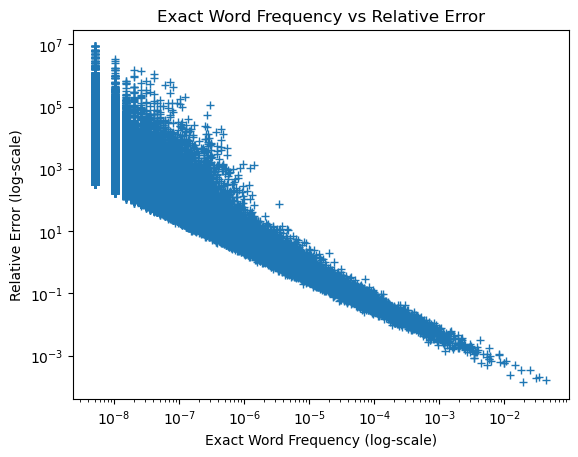

In [127]:
#Plot
plt.loglog(exact_word_frequency, rel_error, '+')
plt.xlabel('Exact Word Frequency (log-scale)')
plt.ylabel('Relative Error (log-scale)')
plt.title('Exact Word Frequency vs Relative Error')
plt.savefig('freq_rel_error_plot.png')
plt.show()